In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [2]:
%matplotlib inline

# Implementing SVM using CVXOPT
(Based on: http://goelhardik.github.io/2016/11/28/svm-cvxopt/)

In [3]:
# Generate test data
np.random.seed(0)
X1 = np.random.multivariate_normal([1,1], [[1,0],[0,1]], 100)
X2 = np.random.multivariate_normal([4,4], [[1.5,0],[0,1.5]], 100)
X = np.vstack([X1,X2])
y1 = np.ones((1,100))
y2 = -1*np.ones((1,100))
y = np.ravel(np.hstack([y1,y2]).T)
n = len(y)
C = 10

In [4]:
import cvxopt as cvx

M = np.dot(np.diag(y),X)
Q = cvx.matrix(np.dot(M,M.T), tc='d')
p = cvx.matrix(-1*np.ones((n,1)), tc='d')

# inequality constraints - linear separable
#A = cvx.matrix(-np.eye(n))
#b = cvx.matrix(np.zeros(n))

# inequality constraints - not linear separable
A = cvx.matrix(np.vstack([np.eye(n),-1*np.eye(n)]), tc='d')
b = cvx.matrix(np.vstack([C*np.ones((n,1)), np.zeros((n,1))]), tc='d')

# equality constraint
A_eq = cvx.matrix(y.reshape(1, -1), tc='d')
b_eq = cvx.matrix(np.zeros(1), tc='d')

sol = cvx.solvers.qp(Q, p, A, b, A_eq, b_eq)

     pcost       dcost       gap    pres   dres
 0: -2.3965e+02 -1.1741e+04  3e+04  7e-01  6e-13
 1: -1.3969e+02 -2.5965e+03  4e+03  6e-02  7e-13
 2: -1.1345e+02 -6.0262e+02  6e+02  9e-03  4e-13
 3: -1.3795e+02 -3.2298e+02  2e+02  3e-03  5e-13
 4: -1.4707e+02 -2.5194e+02  1e+02  1e-03  5e-13
 5: -1.5626e+02 -2.3301e+02  8e+01  5e-04  4e-13
 6: -1.5687e+02 -2.1668e+02  6e+01  2e-04  4e-13
 7: -1.6277e+02 -2.1942e+02  6e+01  2e-04  4e-13
 8: -1.6679e+02 -2.0450e+02  4e+01  7e-05  5e-13
 9: -1.7113e+02 -1.9326e+02  2e+01  2e-05  5e-13
10: -1.7777e+02 -1.8151e+02  4e+00  2e-06  5e-13
11: -1.7748e+02 -1.8099e+02  4e+00  1e-06  6e-13
12: -1.7833e+02 -1.7975e+02  1e+00  1e-14  6e-13
13: -1.7891e+02 -1.7908e+02  2e-01  4e-15  6e-13
14: -1.7898e+02 -1.7899e+02  7e-03  7e-15  7e-13
15: -1.7899e+02 -1.7899e+02  7e-05  3e-14  6e-13
Optimal solution found.


In [5]:
# get weights
alpha = np.array(sol['x'])
w = np.sum(alpha * y[:, None] * X, axis = 0)
# get bias
support = np.where(((alpha > 1e-4) & (alpha<C)).reshape(-1))[0]
cond = support[0]
b = (y[cond] - np.dot(X[cond], w))

In [6]:
np.where(alpha > 1e-4)

(array([  0,   1,  14,  18,  42,  48,  54,  55,  72,  99, 122, 124, 128,
        135, 153, 167, 175, 178, 191, 193]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

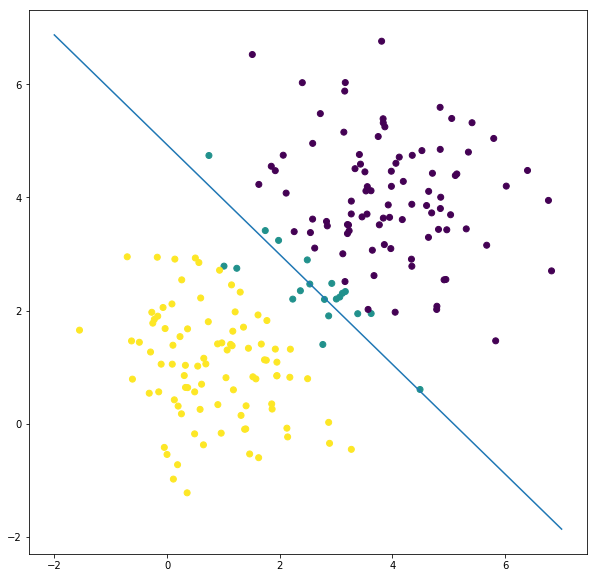

In [7]:
plt.figure(figsize=(10,10))
col = y
col[support] = 0
plt.scatter(X[:,0],X[:,1], c = y)
slope = -w[0] / w[1]
intercept = -b / w[1]
x_plot = np.linspace(-2, 7)
plt.plot(x_plot, x_plot * slope + intercept)